In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit


In [222]:
def coefs(t1,t2,SN1,SN2):
    b=np.log10(SN2/SN1)/np.log10(t2/t1)
    a=SN1/t1**b
    return a,b

def f(x, meta_A, meta_B): # this is your 'straight line' y=f(x)
    return meta_A*x + meta_B


In [99]:
t1ar=np.array([1e1,1e1,1e1,3e1])
t2ar=4e3*np.ones(4)
S1ar=np.array([6e0,1e0,1.6e-1,1.8e-1])
S2ar=np.array([5e2,1.4e2,3.9e1,2e1])

In [100]:
Var0=np.array([6,8,10,11])

In [101]:
mycoefs=coefs(t1ar,t2ar,S1ar,S2ar)

In [102]:
popt, pcov = curve_fit(f, Var0, np.log10(mycoefs[0]))

Text(0, 0.5, 'A')

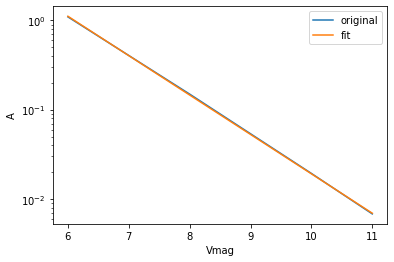

In [103]:
y=mycoefs[0]
popt, pcov = curve_fit(f, Var0, np.log10(y))
plt.plot(Var0,y,label='original')
plt.plot(Var0,10**f(Var0,popt[0],popt[1]),label='fit')
plt.yscale('log')
plt.legend()
plt.xlabel('Vmag')
plt.ylabel('A')


In [104]:
poptA=popt

Text(0, 0.5, 'B')

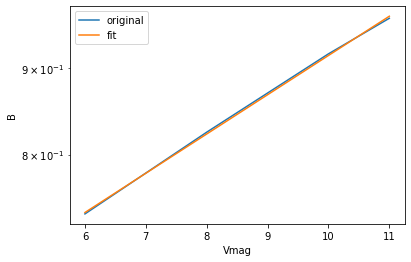

In [105]:
y=mycoefs[1]
popt, pcov1 = curve_fit(f, Var0, np.log10(y))
plt.plot(Var0,y,label='original')
plt.plot(Var0,10**f(Var0,popt[0],popt[1]),label='fit')
plt.yscale('log')
plt.legend()
plt.xlabel('Vmag')
plt.ylabel('B')

In [106]:
poptB=popt

In [107]:
names=['V=6','V=8','V=10','V=11']

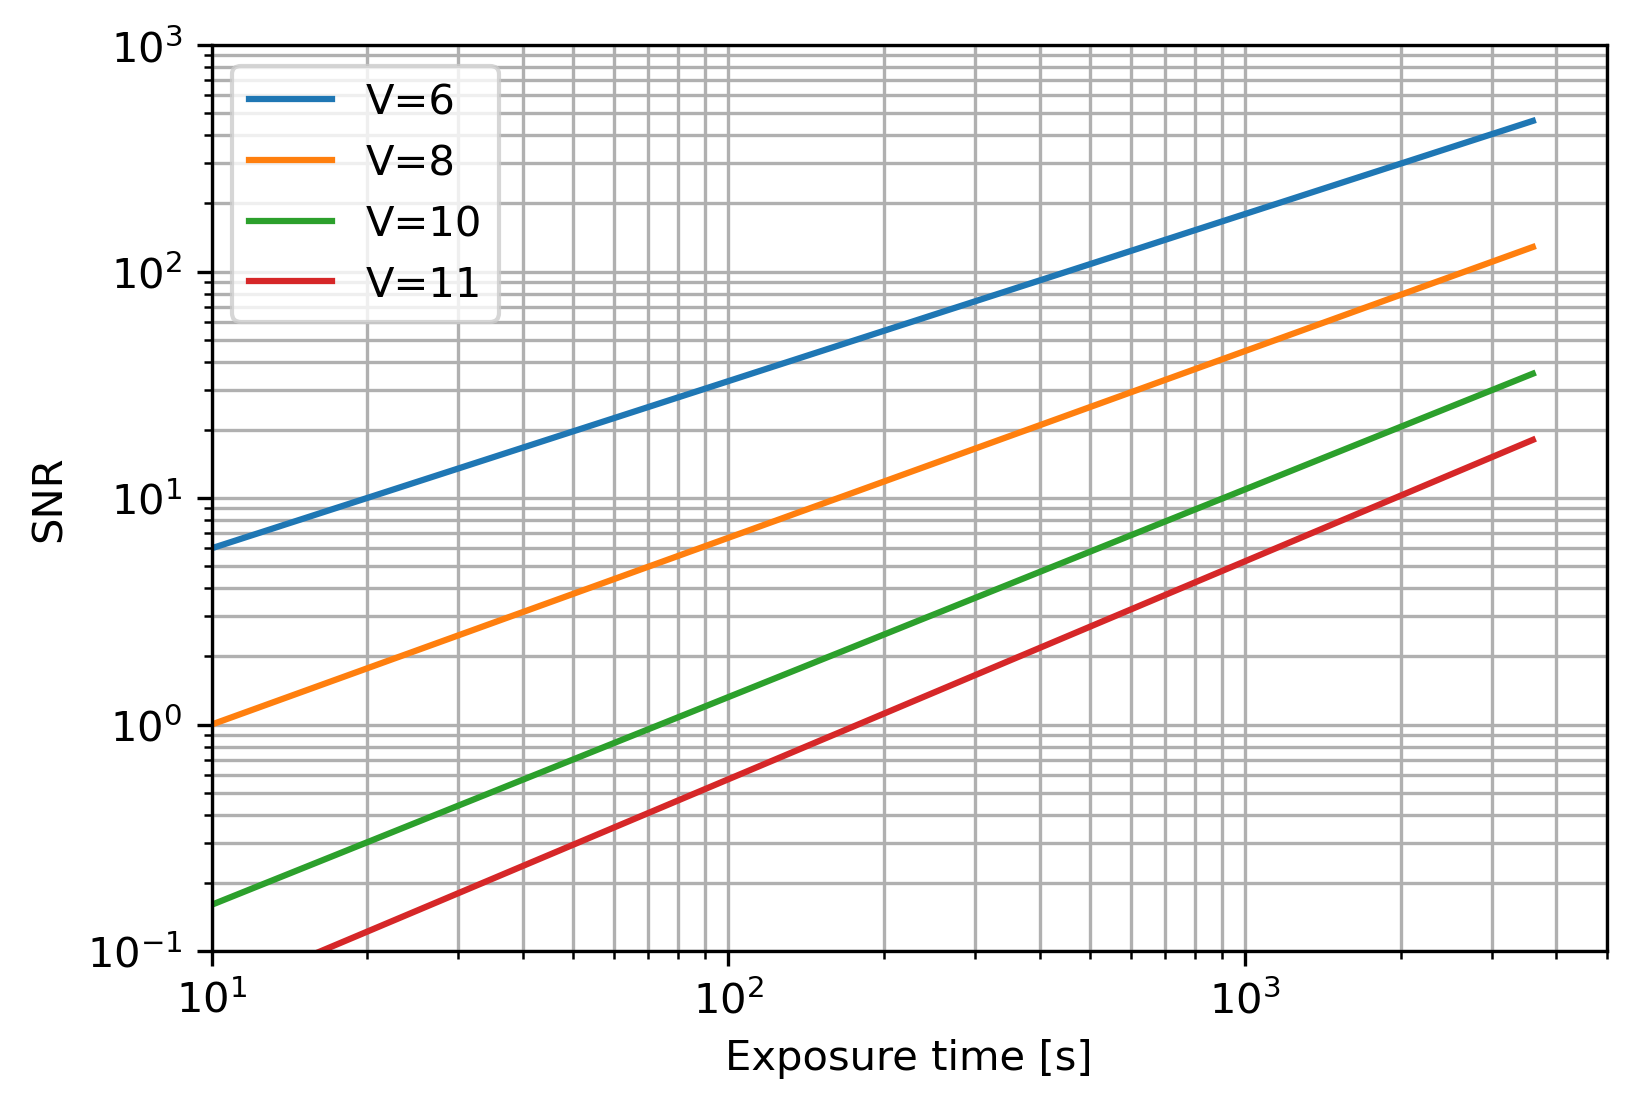

In [108]:
#emulate original plot with mycoefs -> not from coefficient fit
plt.figure(dpi=300)
time=np.linspace(1e1,3.6e3,10)
for ai,bi,label in zip(mycoefs[0],mycoefs[1],names):
    plt.plot(time,ai*time**bi,label=label)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Exposure time [s]')
plt.ylabel('SNR')
plt.xlim(1e1,5e3)
plt.ylim(1e-1,1e3)
plt.grid(which='both')

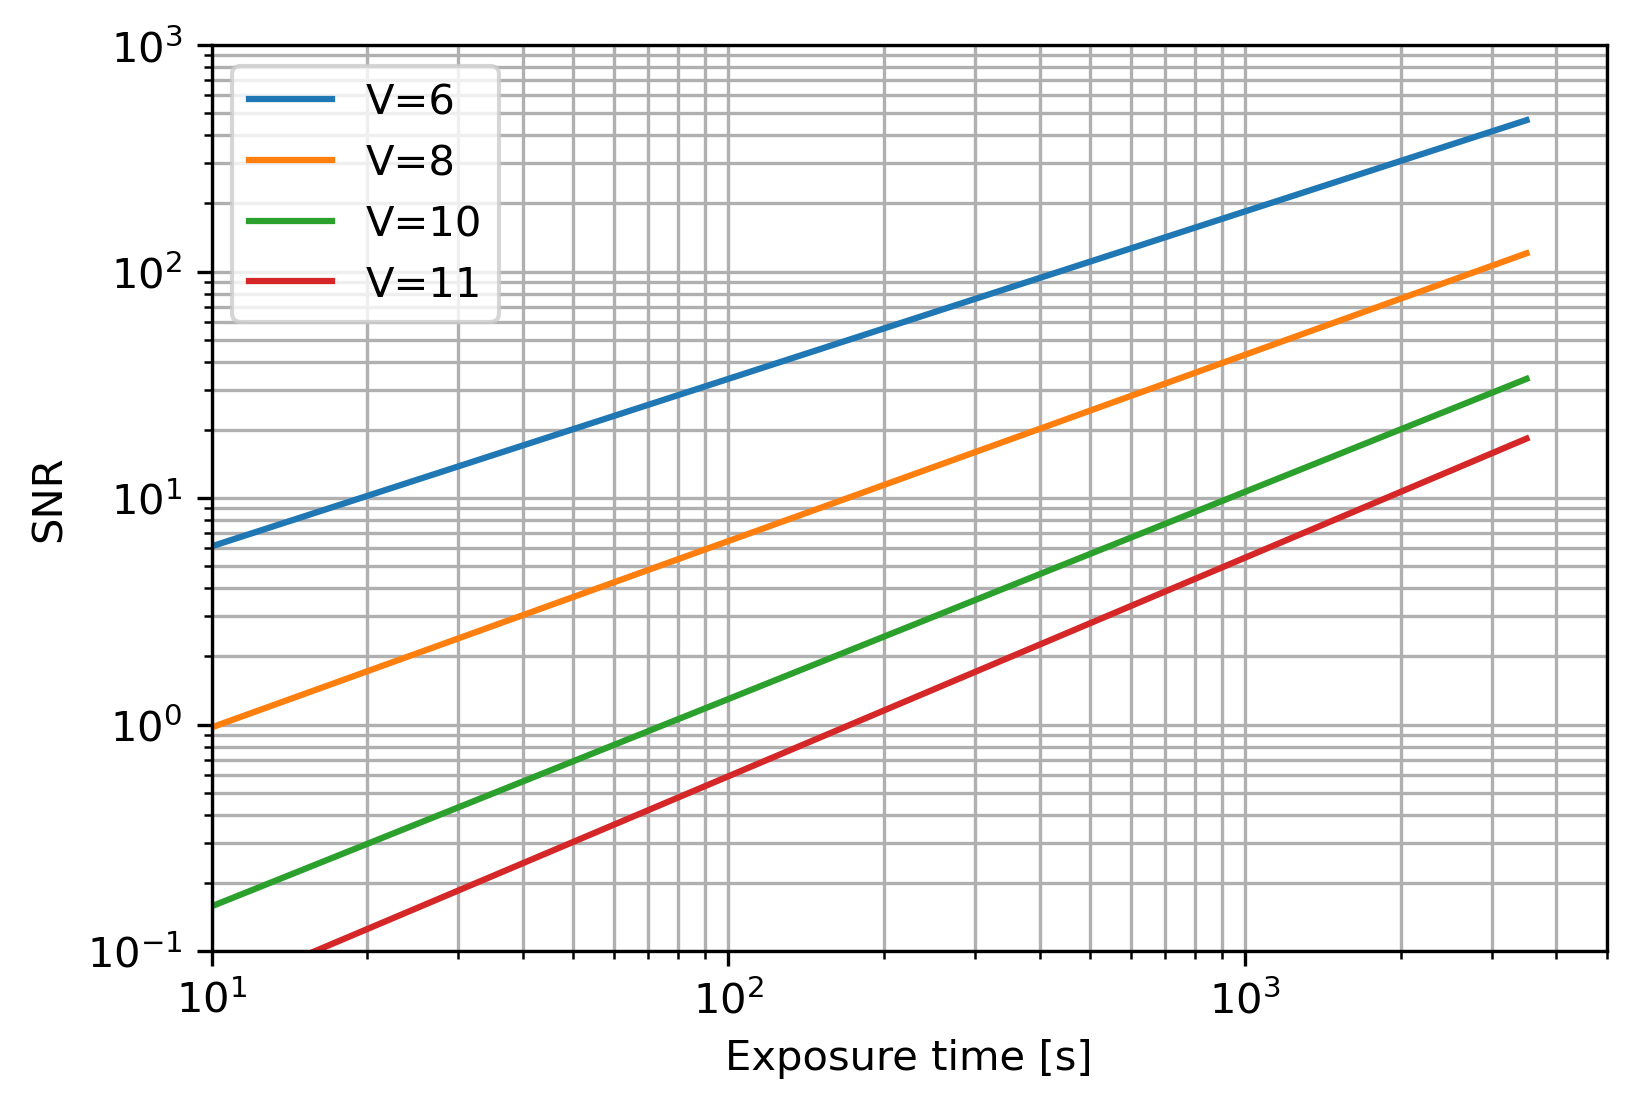

In [109]:
#emulate original plot with coefficient fit
Aar=10**f(Var0,poptA[0],poptA[1])
Bar=10**f(Var0,poptB[0],poptB[1])

plt.figure(dpi=300)
time=np.linspace(1e1,3.5e3,10)
for ai,bi,label in zip(Aar,Bar,names):
    plt.plot(time,ai*time**bi,label=label)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Exposure time [s]')
plt.ylabel('SNR')
plt.xlim(1e1,5e3)
plt.ylim(1e-1,1e3)
plt.grid(which='both')

In [111]:
names2=['V=6','V=7','V=8','V=9','V=10','V=11']
Var=np.array([6,7,8,9,10,11])


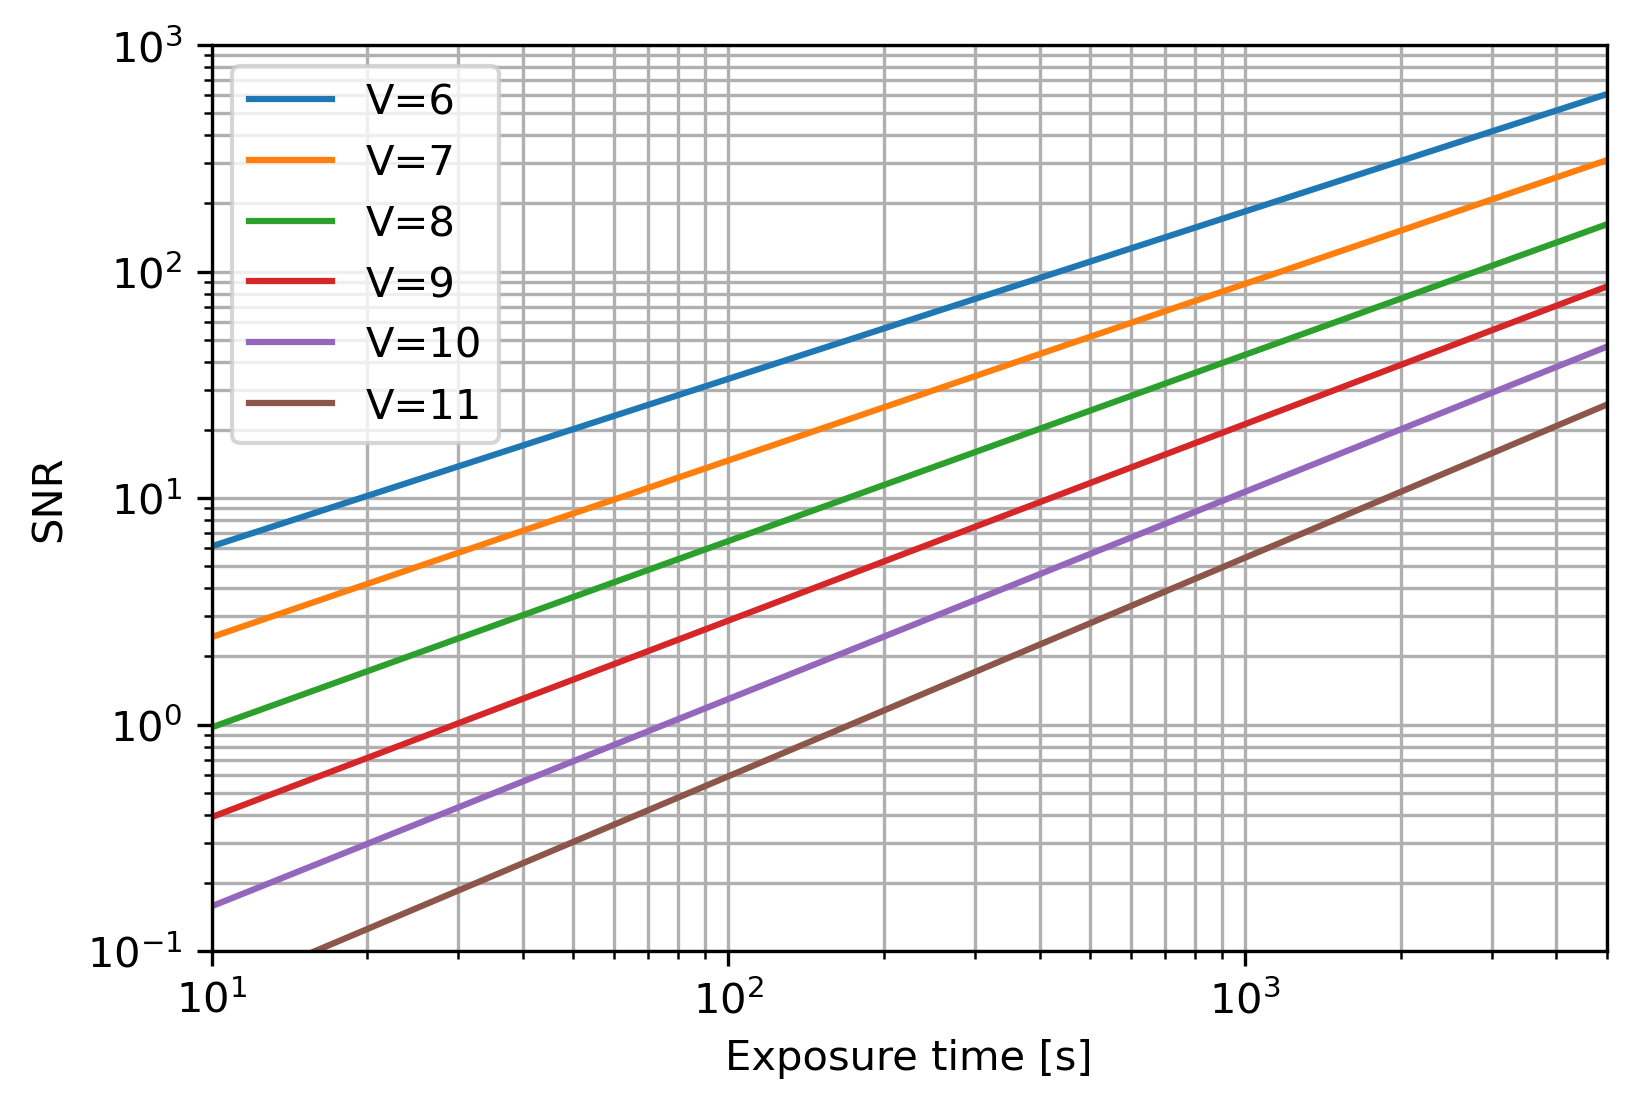

In [112]:
plt.figure(dpi=300)
Aar=10**f(Var,poptA[0],poptA[1])
Bar=10**f(Var,poptB[0],poptB[1])

time=np.linspace(1e1,5e3,10)
for ai,bi,label in zip(Aar,Bar,names2):
    plt.plot(time,ai*time**bi,label=label)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Exposure time [s]')
plt.ylabel('SNR')
plt.xlim(1e1,5e3)
plt.ylim(1e-1,1e3)
plt.grid(which='both')

In [117]:
poptA,poptB

(array([-0.4412292 ,  2.69454634]), array([ 0.02314102, -0.26984885]))

In [118]:
def exp_time(Vmag,SNR,poptA=poptA,poptB=poptB):
#    poptA=np.array([-0.4412292 ,  2.69454634]) # if used as stand-alone
#    poptB=np.array([0.02314102, -0.26984885])
    A=10**f(Vmag,poptA[0],poptA[1])
    B=10**f(Vmag,poptB[0],poptB[1])
    texp=(SNR/A)**(1/B)
    return texp # in seconds

    

In [127]:
def exp_time_fideos(Vmag,SNR):
    poptA=np.array([-0.4412292 ,  2.69454634])
    poptB=np.array([0.02314102, -0.26984885])
    A=10**(Vmag*poptA[0]+poptA[1])
    B=10**(Vmag*poptB[0]+poptB[1])
    texp=(SNR/A)**(1/B)
    return texp # in seconds

In [128]:
exp_time(10,40)/3600

1.176871705114718

In [129]:
exp_time_fideos(10,40)/3600

1.1768709789218386

In [136]:
from scipy.optimize import brentq

In [282]:
def rootfunc(b,S,t,poptA=poptA,poptB=poptB):
    f1=(np.log10(S/t**b)-poptA[1])/poptA[0]
    f2=(np.log10(b)-poptB[1])/poptB[0]
    return(f1-f2)

In [284]:
def find_vmax(S,t):
    bopt=brentq(rootfunc,0.01,1,args=(S,t))
    Vmax=(np.log10(bopt)-poptB[1])/poptB[0]
    return Vmax

In [288]:
find_vmax(70,3600)

8.872178621621472

In [291]:
exp_time_fideos(9.05,200)/3600

3.807361515803596

In [292]:
exp_time_fideos(9.35,200)/3600

4.620992099032328